In [155]:
# importing pandas and setting display parameters

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)


In [156]:
#import prospective and retrospective data
df_prospective = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Prospective')
df_retro = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Retro')

In [157]:
#checking shape of dataframe
print( "Shape of prospective data \n" + str(df_prospective.shape))
print("Shape of retrospective data \n" + str(df_retro.shape))

Shape of prospective data 
(921, 161)
Shape of retrospective data 
(2391, 161)


In [158]:
#Assigining identifying tags to each record
df_prospective['data_record'] = 'prospective' 
df_retro['data_record'] = 'retro' 

In [159]:
# combine both dataframes vertically
df = df_prospective.append(df_retro)
print("Shape of the combined dataframe \n"+ str(df.shape)) #checkign the shape of combined dataframe

Shape of the combined dataframe 
(3312, 162)


In [160]:
# Checking the contents of the dataframe
df.head(5)

,PATIENT NUMBER,PROC NAME,CENTER CODE,SURGEON CODE,REC PROGRESS,CREATED DATE,GENDER,DATE OF BIRTH,AGE AT SURGERY,MARITAL STATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),ECOG,CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,TYPE OF SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,SIDE OF SURGERY,PRE-OP MULTIFOCALITY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,PADUA RISK,POLAR LOCATION,RIM LOCATION,RENAL SINUS,UCS INVASION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO SCORE,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,NEARNESS OF TUMOUR,ANTERIOR OR POSTERIOR,LOCATION TO POLAR LINE,Tumor Consistency on Imaging,Bosniak Classification,DATE OF SURGERY,ASA SCORE,PARTIAL NEPHRO INDICATION,MULTIFOCALITY,NO OF LESIONS,Imaging Features of other excised tumor,Consistency of the other excised tumor/s,ACCESS,DA VINCI MODEL,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,PRIMARY SURGEON,OPERATIVE TIME(min),ISCHEMIA,CLAMP ARTERY,SELECTIVE ARTERIAL CLAMPING,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,INNER RENORRHAPHY,OUTER RENORRHAPHY,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,HAEMOSTATIC Details,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,SURGICAL CONSIDERATIONS,INTRA-OP COMPLICATION,INTRA-OP COMPLICATIONS,Need to Convert to Radical Nephrectomy,TREATMENT OF COMPLICATION,POST-OP COMPLICATION,SURGICAL COMPLICATIONS,NON SURGICAL COMPLICATIONS,POST-OP TREATMENT OF COMPLICATION,CLAVIEN GRADE,POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPE MALIGNANAT,HYSTOTYPE MALIGNANAT YES,HYSTOTYPE BENIGN,HYSTOTYPE BENIGN YES,FUHRMAN GRADING,SARCOMATOID DIFF,%SARCOMATOID DIFF,NECROSIS,MICRO VENOUS INVASION,UCS INVASION.1,PERIRENAL FAT INVASION,Hilar Fat Invasion,SINUS FAT INVASION,MIC SCORE,ADRENAL INVASION,GEROTA INVASION,Renal Vein Invasion,VENOUS THROMBUS,SURGICAL MARGIN,UNIFOCAL/MULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITE OF POSITIVE NODE,TREATMENT PSM,PT,PN,OTHER TUMORS,DATE OF RECURRENCE,LAST FOLLOW UP DURATION,TIME TO RECURRENCE,LAST FOLLOW UP STATUS,LAST FOLLOW UP RECURRENCE,LAST TREATMENT OF RECURRENCE,TYPE OF COMPLICATIONS(s),SELECTED SURGICAL COMPLICATIONS(s),SELECTED NON SURGICAL COMPLICATIONS(s),TREATMENT OF COMPLICATIONS(s),RECURRENCE(s),FOLLOW UP DATE(s),STATUS(s),TREATMENT(s),CREATININE(s),EGFR(s),SRF(s),ERPF(s),data_record
0,21PAT000148,Partial Nephrectomy,GQHLD5Q4,CWQW6ZDS,Follow-up1,2017-09-24 18:30:00.0,Female,1967.0,50.0,Married,Others,Graduate,57.00,168.0,20.20,7.0,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,Posterior,Lower Pole,13.2,50,7800,0.63,67.7,100.030000,50,168.5,12.0,3(High Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),With renal sinus involvement (2 points),"With involving, dislocation or infiltration of...",< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,11x,3(High Risk),=>7,<50%,=<4,Neither(x),3.0,Entirely solid,Entirely solid tumor,2017-09-24 00:00:00.0,Category 1,Elective,No,1.0,NP,Entirely solid tumor,Transperitoneal,Xi,4-arms,5 mm + 12 mm,No,Staff,3:40,Warm,Satinsky Clamp,No,Satinsky Clamp,No,Not Used,Yes,Yes,24,Performed,Yes,Surgicel+surgiflo,Not Performed,600,1 Unit,NaN,Yes,"180,310",No,NaN,No Complications,NaN,NaN,NaN,Grade 0: Absence of any complication,9.5,28.8,0.8,75.7,14600,999.0,999.0,999,999,999,999.0,999.0,999.00,999,999,5.0,8.5,0.4,0.4,Absent,Benign,No,NaN,Yes,Angiomyolipoma,999,Absent,0.0,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,A

In [161]:
# Print data type and count of non-null entries for each variable
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 2390
Data columns (total 162 columns):
PATIENT NUMBER                              3312 non-null object
PROC NAME                                   3312 non-null object
CENTER CODE                                 3312 non-null object
SURGEON CODE                                921 non-null object
REC PROGRESS                                3312 non-null object
CREATED DATE                                3312 non-null object
GENDER                                      3302 non-null object
DATE OF BIRTH                               1919 non-null float64
AGE AT SURGERY                              3294 non-null float64
MARITAL STATUS                              2080 non-null object
RACE                                        2016 non-null object
EDUCATION                                   1843 non-null object
WEIGHT                                      2327 non-null float64
HEIGHT                                      2

In [162]:
#List of columns in the dataframe which were imported as object datatype but need to be converted to numeric
#This list was developed by checking the contents of the variables and their respective meaning as defined by the data dictionary

numeric_col_list = [
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP WBC',
 'PRE-OP CREAT',
 'PRE-OP GFR',
 'PRE-OP EGFR',
 'PRE-OP Split Renal Function',
 'PRE-OP ERPF',
 'PADUA SCORE',
 'PADUA RISK',
 'NO OF LESIONS',
 'POST-OP HB_Day 1',
 'POST-OP HT_Day 1',
 'POST-OP Creat_Day 1',
 'POST-OP EGFR_Day 1',
 'POST-OP WBC_Day 1',
 'POST-OP HB_Day 2',
 'POST-OP HT_Day 2',
 'POST-OP Creat_Day 2',
 'POST-OP EGFR_Day 2',
 'POST-OP WBC_Day 2',
 'POST-OP HB_Day 3',
 'POST-OP HT_Day 3',
 'POST-OP Creat_Day 3',
 'POST-OP EGFR_Day 3',
 'POST-OP WBC_Day 3',
 'LENGTH OF STAY (days)',
 'PATHOLOGICAL TUMOR SIZE',
 'MIN THICKNESS MARGIN',
 'MAX THICKNESS MARGIN',
 'FUHRMAN GRADING',
'BLOOD LOSS (ml)',
'R.E.N.A.L. NEPHRO SCORE',
'OPERATIVE TIME(min)',
'ISCHEMIA TIME (min)',
] 


In [163]:
# Converts each variable to numberic and coerces non-numeric data/errors to NaN i.e. missing
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [164]:
df.describe()

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,PADUA RISK,R.E.N.A.L. NEPHRO SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,OPERATIVE TIME(min),ISCHEMIA TIME (min),BLOOD LOSS (ml),POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,FUHRMAN GRADING,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00000,3294.000000,2327.000000,2289.00000,2958.000000,3122.000000,2737.000000,2702.000000,2503.000000,2375.000000,2036.000000,3264.000000,742.000000,2569.000000,431.000000,407.000000,2123.000000,2.0,1748.000000,1944.000000,2678.000000,2145.000000,2952.000000,3167.000000,1854.000000,2003.000000,2915.000000,2369.000000,1503.000000,1114.000000,1154.000000,1339.000000,1111.000000,1102.000000,986.000000,996.000000,1199.000000,936.000000,982.000000,3067.000000,2781.000000,1664.000000,974.000000,2467.000000,1365.000000,2290.000000,1923.000000
mean,1955.81136,57.843655,90.291609,161.08460,28.906286,43.947341,1.522835,3.541451,27.537609,53.160004,2893.944244,6.943323,283.981119,80.452488,721.529884,801.416388,8.404145,0.0,6.844394,1.899177,1.053771,190.185548,22.842646,187.341964,88.982303,65.773334,28.085796,182.926855,3200.020346,335.618887,349.216124,266.151045,443.618398,3088.594365,468.772809,509.636336,376.595229,564.255566,2669.210519,3.161722,11.626124,274.839844,690.035421,76.104986,14.015385,0.297817,16.916485
std,13.14144,12.702301,40.666559,29.14078,8.013751,333.125372,1.916268,2.199328,115.724727,126.115087,3848.067753,76.017258,389.238748,24.170568,430.002455,359.654829,1.748467,0.0,1.847301,0.822433,0.266591,101.787261,63.230208,277.988202,252.482593,179.359694,161.091198,309.104139,5536.248742,458.270906,456.519416,440.391876,459.346858,5519.573901,490.323768,484.899641,483.504763,465.121524,3893.589081,2.479386,40.328840,2490.582220,3321.287384,261.287803,154.822902,0.457398,19.503374
min,1921.00000,0.000000,7.711150,51.00000,2.320000,0.000000,0.000000,0.000000,0.504167,0.246000,2.700000,0.000000,0.600000,0.266354,20.700000,38.300000,2.000000,0.0,2.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.253000,0.000000,1.260000,0.000000,1.330000,0.204000,0.450000,11.000000,2.100000,0.300000,0.284000,0.270000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-999.000000,0.000000,-0.800000
25%,1946.00000,49.000000,69.000000,160.00000,24.610000,21.000000,0.000000,2.000000,12.800000,36.300000,6.760000,0.780000,60.000000,65.720000,100.000000,999.000000,7.000000,0.0,5.000000,1.000000,1.000000,140.000000,14.000000,50.000000,11.100000,31.250000,0.950000,54.010000,9.900000,11.300000,31.800000,1.000000,58.595000,11.100000,11.500000,33.075000,1.000000,69.000000,13.450000,2.000000,2.400000,1.000000,3.625000,2.000000,0.000000,0.000000,3.000000
50%,1955.00000,59.000000,80.000000,169.00000,27.700000,30.000000,1.000000,3.000000,13.900000,41.000000,10.400000,0.910000,82.450000,79.572342,999.000000,999.000000,8.000000,0.0,7.000000,2.000000,1.000000,177.000000,18.000000,100.000000,12.300000,35.400000,1.000000,69.000000,14.100000,13.000000,37.000000,1.300000,86.000000,999.000000,14.350000,45.500000,1.400000,999.000000,999.000000,3.000000,3.500000,3.000000,999.000000,2.000000,0.000000,0.000000,10.000000
75%,1965.00000,67.000000,94.750000,176.00000,31.910000,42.000000,2.000000,5.000000,14.900000,44.000000,6400.000000,1.100000,130.325000,94.000000,999.000000,999.000000,10.000000,0.0,8.000000,3.000000,1.000000,218.000000,23.000000,200.000000,13.800000,38.900000,1.320000,88.500000,7112.000000,999.000000,999.000000,999.000000,999.000000,5100.000

In [165]:
# Removing variables with more than 30% missing data
df = df[df.columns[df.isnull().mean() < 0.30]]

In [166]:
# Print datatype and count of non-null entries for each variable
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 2390
Data columns (total 79 columns):
PATIENT NUMBER                            3312 non-null object
PROC NAME                                 3312 non-null object
CENTER CODE                               3312 non-null object
REC PROGRESS                              3312 non-null object
CREATED DATE                              3312 non-null object
GENDER                                    3302 non-null object
AGE AT SURGERY                            3294 non-null float64
WEIGHT                                    2327 non-null float64
BMI                                       2958 non-null float64
CLINICAL SIZE (mm)                        3122 non-null float64
CHARLSON SCORE                            2737 non-null float64
CHARLSON AGE-ADJUST SCORE                 2702 non-null float64
SYMPTOMS                                  2486 non-null object
SOLITARY KIDNEY                           2787 non-null object
SIDE 

In [167]:
# Since the traget variable is "BLOOD LOSS (ml)" drop the records that do not have the target variable data 
df = df.dropna(axis = 0, subset = ['BLOOD LOSS (ml)'])

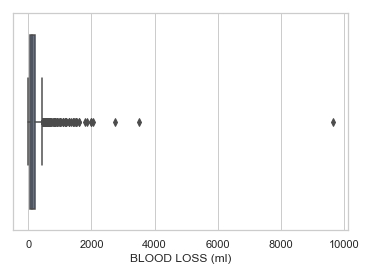

In [168]:
# Display a box-plot for "BLOOD LOSS (ml)" 
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=df['BLOOD LOSS (ml)'])

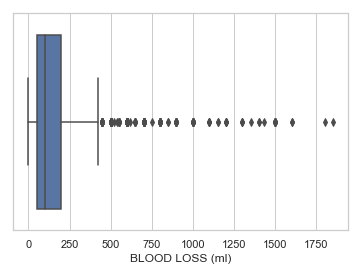

In [169]:
# checking the distribution of data by removing outliers
sns.boxplot(x = df[df['BLOOD LOSS (ml)']<2000]['BLOOD LOSS (ml)'])

In [170]:
# Subseting the data frame using a upper value for target variable
df = df[df['BLOOD LOSS (ml)']<2000]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3161 entries, 0 to 2384
Data columns (total 79 columns):
PATIENT NUMBER                            3161 non-null object
PROC NAME                                 3161 non-null object
CENTER CODE                               3161 non-null object
REC PROGRESS                              3161 non-null object
CREATED DATE                              3161 non-null object
GENDER                                    3161 non-null object
AGE AT SURGERY                            3156 non-null float64
WEIGHT                                    2246 non-null float64
BMI                                       2876 non-null float64
CLINICAL SIZE (mm)                        2988 non-null float64
CHARLSON SCORE                            2630 non-null float64
CHARLSON AGE-ADJUST SCORE                 2575 non-null float64
SYMPTOMS                                  2360 non-null object
SOLITARY KIDNEY                           2661 non-null object
SIDE 

In [172]:
# Replcaing missing values in variables of data type object with NA
col = list(df.select_dtypes('object'))
for k in col:
    df[k] = df[k].fillna("NA")

In [173]:
# Replacing missing values in variables of datatype float64 with their respective mean
col_numeric = list(df.select_dtypes('float64'))
for k in col_numeric:
    df[k] = df[k].fillna(df[k].mean())

In [174]:
# Check if the number of entries is equal non-null object for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3161 entries, 0 to 2384
Data columns (total 79 columns):
PATIENT NUMBER                            3161 non-null object
PROC NAME                                 3161 non-null object
CENTER CODE                               3161 non-null object
REC PROGRESS                              3161 non-null object
CREATED DATE                              3161 non-null object
GENDER                                    3161 non-null object
AGE AT SURGERY                            3161 non-null float64
WEIGHT                                    3161 non-null float64
BMI                                       3161 non-null float64
CLINICAL SIZE (mm)                        3161 non-null float64
CHARLSON SCORE                            3161 non-null float64
CHARLSON AGE-ADJUST SCORE                 3161 non-null float64
SYMPTOMS                                  3161 non-null object
SOLITARY KIDNEY                           3161 non-null object
SIDE 

In [175]:
# Create a list of unique count for each variable
# This can help us detrmine which variables can be converted to datatype 'category'
# The objective is to avoid converting variables with 100s of unique values into categorical variable
col = list(df.select_dtypes('object'))
unique_count_list = {col:len(df[col].unique()) for col in col}
unique_count_list

{'PATIENT NUMBER': 3161,
 'PROC NAME': 1,
 'CENTER CODE': 20,
 'REC PROGRESS': 10,
 'CREATED DATE': 644,
 'GENDER': 2,
 'SYMPTOMS': 4,
 'SOLITARY KIDNEY': 3,
 'SIDE OF SURGERY': 4,
 'FACE': 3,
 'TUMOR lOCATION': 4,
 'POLAR LOCATION': 3,
 'EXOPHYTIC RATE': 4,
 'CLINICAL SIZE GROUP': 4,
 'CT': 7,
 'CN': 4,
 'CM': 4,
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION': 5,
 'RADIUS (maximal diameter in cm)': 4,
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES': 4,
 'ANTERIOR OR POSTERIOR': 4,
 'DATE OF SURGERY': 1761,
 'ASA SCORE': 5,
 'PARTIAL NEPHRO INDICATION': 4,
 'ACCESS': 3,
 'ROBOTICS ARMS': 4,
 'ASSISTENT TROCARS': 3,
 'DUAL CONSOLE': 3,
 'ISCHEMIA': 4,
 'CLAMP ARTERY': 5,
 'CLAMP VEIN': 5,
 'EARLY UNCLAMPING': 3,
 'FLUORESCENCE': 3,
 'UCS REPAIR': 3,
 'HAEMOSTATIC AGENTS': 3,
 'LYMPH NODE DISSECTION(LND)': 3,
 'INTRA-OP TRANSUFUSION': 4,
 'INTRA-OP COMPLICATION': 3,
 'POST-OP COMPLICATION': 3,
 'MULITIFOCALITY': 3,
 'PATHOLOGY': 3,
 'HYSTOTYPE MALIGNANAT': 3,
 'HYSTOTYPE MALIGNANAT YES': 10,
 'HYSTOTYPE BE

In [176]:
# Coverting Variables
for col in unique_count_list:
    if unique_count_list[col]<10:
        df[col] = df[col].astype('category')

In [177]:
# List of columns not converted to category
list(df.select_dtypes('object'))

['PATIENT NUMBER',
 'CENTER CODE',
 'REC PROGRESS',
 'CREATED DATE',
 'DATE OF SURGERY',
 'HYSTOTYPE MALIGNANAT YES',
 'TYPE OF COMPLICATIONS(s)',
 'SELECTED SURGICAL COMPLICATIONS(s)',
 'SELECTED NON SURGICAL COMPLICATIONS(s)',
 'TREATMENT OF COMPLICATIONS(s)',
 'RECURRENCE(s)',
 'FOLLOW UP DATE(s)',
 'STATUS(s)',
 'TREATMENT(s)',
 'CREATININE(s)',
 'EGFR(s)',
 'SRF(s)',
 'ERPF(s)']

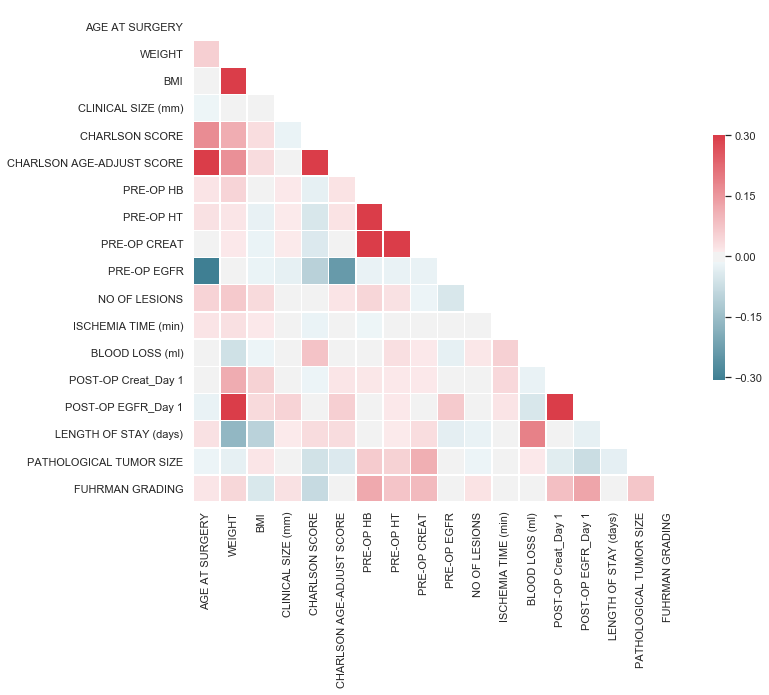

In [178]:
# Create a correlation plot to visualize the correlation between numeric columns 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [179]:
list(df) # Print a list of columns in dataframe

['PATIENT NUMBER',
 'PROC NAME',
 'CENTER CODE',
 'REC PROGRESS',
 'CREATED DATE',
 'GENDER',
 'AGE AT SURGERY',
 'WEIGHT',
 'BMI',
 'CLINICAL SIZE (mm)',
 'CHARLSON SCORE',
 'CHARLSON AGE-ADJUST SCORE',
 'SYMPTOMS',
 'SOLITARY KIDNEY',
 'SIDE OF SURGERY',
 'FACE',
 'TUMOR lOCATION',
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP CREAT',
 'PRE-OP EGFR',
 'POLAR LOCATION',
 'EXOPHYTIC RATE',
 'CLINICAL SIZE GROUP',
 'CT',
 'CN',
 'CM',
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION',
 'RADIUS (maximal diameter in cm)',
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES',
 'ANTERIOR OR POSTERIOR',
 'DATE OF SURGERY',
 'ASA SCORE',
 'PARTIAL NEPHRO INDICATION',
 'NO OF LESIONS',
 'ACCESS',
 'ROBOTICS ARMS',
 'ASSISTENT TROCARS',
 'DUAL CONSOLE',
 'ISCHEMIA',
 'CLAMP ARTERY',
 'CLAMP VEIN',
 'EARLY UNCLAMPING',
 'FLUORESCENCE',
 'ISCHEMIA TIME (min)',
 'UCS REPAIR',
 'HAEMOSTATIC AGENTS',
 'LYMPH NODE DISSECTION(LND)',
 'BLOOD LOSS (ml)',
 'INTRA-OP TRANSUFUSION',
 'INTRA-OP COMPLICATION',
 'POST-OP COMPLICATION',
 'POST-O

In [180]:
# Selecting variables which are geberated before traget variable is recorded
# This required because in real-time predicton other variable would not have been populated until the target variable is recorded

df_filter_intra_op = df[['PROC NAME',
 'GENDER',
 'AGE AT SURGERY',
 'BMI',
 'CLINICAL SIZE (mm)',
 'CHARLSON SCORE',
 'CHARLSON AGE-ADJUST SCORE',
 'SYMPTOMS',
 'SOLITARY KIDNEY',
 'SIDE OF SURGERY',
 'FACE',
 'TUMOR lOCATION',
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP CREAT',
 'PRE-OP EGFR',
 'POLAR LOCATION',
 'EXOPHYTIC RATE',
 'CLINICAL SIZE GROUP',
 'CT',
 'CN',
 'CM',
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION',
 'RADIUS (maximal diameter in cm)',
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES',
 'ANTERIOR OR POSTERIOR',
 'ASA SCORE',
 'PARTIAL NEPHRO INDICATION',
 'NO OF LESIONS',
 'ACCESS',

'BLOOD LOSS (ml)']]

In [181]:
df_filter_intra_op.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3161 entries, 0 to 2384
Data columns (total 31 columns):
PROC NAME                                3161 non-null category
GENDER                                   3161 non-null category
AGE AT SURGERY                           3161 non-null float64
BMI                                      3161 non-null float64
CLINICAL SIZE (mm)                       3161 non-null float64
CHARLSON SCORE                           3161 non-null float64
CHARLSON AGE-ADJUST SCORE                3161 non-null float64
SYMPTOMS                                 3161 non-null category
SOLITARY KIDNEY                          3161 non-null category
SIDE OF SURGERY                          3161 non-null category
FACE                                     3161 non-null category
TUMOR lOCATION                           3161 non-null category
PRE-OP HB                                3161 non-null float64
PRE-OP HT                                3161 non-null float64
PRE-

In [182]:
# Creating the a new dataframe to be used for further processing
df_filter2 = df_filter_intra_op.copy()

In [183]:
# Encoding dtaa under categorical columns using label encoder
# This is necessary as sci-kit learn algorithms only work wiht numerioc data.
# Hence all data in the form of text has to be 

columns=df_filter2.select_dtypes('category') # store list of names of variables of datatype 'category'

df_filter2_codes = df_filter2.copy() # create a copy of the dataframe to be encoded
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in columns } # create a dictionary of column name and its respective labelEncoder() 
for col in columns:
    le_dict[col].fit_transform(df_filter2_codes[col]) # fit LabelEncoder() for each column

In [184]:
#Creating a dictionary using label encoder to store mappings of each unique value in every variable
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in columns}
label_mapping

{'PROC NAME': {'Partial Nephrectomy': 0},
 'GENDER': {'Female': 0, 'Male': 1},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARY KIDNEY': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDE OF SURGERY': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'FACE': {'Anterior': 0, 'NA': 1, 'Posterior': 2},
 'TUMOR lOCATION': {'Lower Pole': 0, 'Mid Pole': 1, 'NA': 2, 'Upper Pole': 3},
 'POLAR LOCATION': {'NA': 0,
  'Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points)': 1,
  'Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)': 2},
 'EXOPHYTIC RATE': {'< 50%exophytic (2 points)': 0,
  '= 50% exophytic (1 point)': 1,
  'Endophytic (3 points)': 2,
  'NA': 3},
 'CLINICAL SIZE GROUP': {'4.1cm-7cm': 0, '=<4cm': 1, '=>7cm': 2, 'NA': 3},
 'CT': {'NA': 0, 'T1a': 1, 'T1b': 2, 'T2a': 3, 'T2b': 4, 'T3a': 5, 'T3b': 6},
 'CN': {'N+': 0, 'N0': 1, 'NA': 2, 'Nx': 3},
 'CM

In [185]:
#using encoder to encode the variables
for col in columns:
    df_filter2_codes[col] = le_dict[col].transform(df_filter2_codes[col])
    

In [186]:
# Check the datatype for encoded columns
df_filter2_codes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3161 entries, 0 to 2384
Data columns (total 31 columns):
PROC NAME                                3161 non-null int32
GENDER                                   3161 non-null int32
AGE AT SURGERY                           3161 non-null float64
BMI                                      3161 non-null float64
CLINICAL SIZE (mm)                       3161 non-null float64
CHARLSON SCORE                           3161 non-null float64
CHARLSON AGE-ADJUST SCORE                3161 non-null float64
SYMPTOMS                                 3161 non-null int32
SOLITARY KIDNEY                          3161 non-null int32
SIDE OF SURGERY                          3161 non-null int32
FACE                                     3161 non-null int32
TUMOR lOCATION                           3161 non-null int32
PRE-OP HB                                3161 non-null float64
PRE-OP HT                                3161 non-null float64
PRE-OP CREAT             

In [187]:
# convert the columns from encoded 
#for col in columns:
#    df_filter2_codes[col] = df_filter2_codes[col].astype('category')

In [188]:

df_filter2.head()

,PROC NAME,GENDER,AGE AT SURGERY,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,ACCESS,BLOOD LOSS (ml)
0,Partial Nephrectomy,Female,50.0,20.20,7.0,0.0,2.000000,Absent,No,Left,Posterior,Lower Pole,13.2,50.000,0.63,100.030000,Tumours entirely located above the upper or be...,< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,3(High Risk),=>7,<50%,Neither(x),Category 1,Elective,1.0,Transperitoneal,600.0
1,Partial Nephrectomy,Female,69.0,26.37,74.0,1.0,4.000000,Absent,No,Right,Posterior,Mid Pole,14.7,44.200,0.80,71.119672,Tumours crossing the sinus line >50% or fallin...,= 50% exophytic (1 point),=>7cm,T2a,Nx,M0,2(Intermidiate Risk),=>7,50%,Posterior (p),Category 3,Relative,1.0,Retroperitoneal,300.0
2,Partial Nephrectomy,Female,83.0,31.10,80.0,3.0,8.000000,Absent,No,Left,Anterior,Lower Pole,12.5,38.900,0.97,54.844682,Tumours entirely located above the upper or be...,= 50% exophytic (1 point),=>7cm,T2a,N0,M0,2(Intermidiate Risk),=>7,50%,Anterior (a),Category 2,Elective,1.0,Transperitoneal,700.0
4,Partial Nephrectomy,Male,61.0,28.35,8.0,0.0,3.563495,Absent,No,Right,Posterior,Mid Pole,12.1,37.100,1.10,68.053260,Tumours crossing the sinus line >50% or fallin...,< 50%exophytic (2 points),=>7cm,T2a,N0,M0,3(High Risk),=>7,<50%,Neither(x),Category 2,Elective,1.0,Transperitoneal,300.0
5,Partial Nephrectomy,Male,43.0,24.15,55.0,0.0,3.563495,Local Symptoms,No,Left,Posterior,Mid Pole,15.0,0.455,0.92,89.790998,Tumours entirely located above the upper or be...,= 50% exophytic (1 point),4.1cm-7cm,T1a,Nx,Not Applicable,2(Intermidiate Risk),4 but <7,50%,Posterior (p),Category 1,Elective,1.0,Transperitoneal,800.0


In [189]:
df_filter2_codes.head()

,PROC NAME,GENDER,AGE AT SURGERY,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,ACCESS,BLOOD LOSS (ml)
0,0,0,50.0,20.20,7.0,0.0,2.000000,0,1,1,2,0,13.2,50.000,0.63,100.030000,2,0,2,3,3,3,3,2,1,2,0,1,1.0,2,600.0
1,0,0,69.0,26.37,74.0,1.0,4.000000,0,1,3,2,1,14.7,44.200,0.80,71.119672,1,1,2,3,3,1,2,2,0,3,2,3,1.0,1,300.0
2,0,0,83.0,31.10,80.0,3.0,8.000000,0,1,1,0,0,12.5,38.900,0.97,54.844682,2,1,2,3,1,1,2,2,0,0,1,1,1.0,2,700.0
4,0,1,61.0,28.35,8.0,0.0,3.563495,0,1,3,2,1,12.1,37.100,1.10,68.053260,1,0,2,3,1,1,3,2,1,2,1,1,1.0,2,300.0
5,0,1,43.0,24.15,55.0,0.0,3.563495,1,1,1,2,1,15.0,0.455,0.92,89.790998,2,1,0,1,3,3,2,0,0,3,0,1,1.0,2,800.0


In [190]:
# Assigning predictor variables to Y and Target Variable to Y
X = df_filter2_codes.drop(columns=['BLOOD LOSS (ml)'])
Y = df_filter2_codes['BLOOD LOSS (ml)']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3161 entries, 0 to 2384
Data columns (total 30 columns):
PROC NAME                                3161 non-null int32
GENDER                                   3161 non-null int32
AGE AT SURGERY                           3161 non-null float64
BMI                                      3161 non-null float64
CLINICAL SIZE (mm)                       3161 non-null float64
CHARLSON SCORE                           3161 non-null float64
CHARLSON AGE-ADJUST SCORE                3161 non-null float64
SYMPTOMS                                 3161 non-null int32
SOLITARY KIDNEY                          3161 non-null int32
SIDE OF SURGERY                          3161 non-null int32
FACE                                     3161 non-null int32
TUMOR lOCATION                           3161 non-null int32
PRE-OP HB                                3161 non-null float64
PRE-OP HT                                3161 non-null float64
PRE-OP CREAT             

In [191]:
X.head(1)

,PROC NAME,GENDER,AGE AT SURGERY,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,ACCESS
0,0,0,50.0,20.2,7.0,0.0,2.0,0,1,1,2,0,13.2,50.0,0.63,100.03,2,0,2,3,3,3,3,2,1,2,0,1,1.0,2


In [192]:
Y.head(1)

0    600.0
Name: BLOOD LOSS (ml), dtype: float64

In [193]:
# Splitting up the dataframe into train and test sets
# Validation dataset is not created as we will use cross-validation when training the model
# Cross-validation will helps to elimnate the need to create seperate validation datatset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

X_scaled = scaler.fit_transform(X_train)



H:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
H:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [212]:
pd.DataFrame(X_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,-1.356632,0.413449,0.143920,0.105516,8.403669,0.022990,0.338796,0.314895,0.998617,0.049313,-0.372888,-0.143769,-0.497902,-0.074142,-1.011140,-1.572550,1.467080,-1.213811,-1.650888,0.346330,0.405005,1.606136,-1.220773,1.763901,-0.392965,-1.191354,2.169676,-0.217603,0.725266
1,0.0,-1.356632,0.100161,-0.942767,-0.150248,0.278200,0.247133,0.338796,0.314895,0.998617,-1.104966,1.389096,-0.143769,-0.115488,-0.076100,-0.694336,0.968458,-1.145349,-0.162950,-0.255087,1.524690,-0.784139,-0.184125,-0.049128,-0.084065,-1.196050,0.518892,-0.626623,-0.217603,-0.431499
2,0.0,0.737120,-1.544603,-0.777701,0.322915,-0.882581,0.022990,-0.776407,0.314895,0.998617,1.203591,1.389096,-0.118086,-0.073436,-0.075820,1.509353,0.968458,0.596270,-1.213811,2.536515,-0.832031,-0.784139,0.711005,-1.220773,0.839918,1.213205,-0.336231,-0.626623,-0.217603,0.725266
3,0.0,0.737120,-0.604738,-0.301259,-0.303706,0.278200,0.247133,-0.776407,0.314895,0.998617,1.203591,1.389096,-0.120141,-0.043809,-0.073862,-0.005893,0.968458,0.596270,-0.162950,-0.255087,-0.832031,1.594149,0.711005,-0.049128,0.839918,1.213205,-1.191354,-0.626623,-0.217603,0.725266
4,0.0,-1.356632,-2.562790,-1.310415,0.059814,-0.882581,0.022990,1.453998,-2.126993,0.998617,0.049313,0.508104,-0.137605,-0.105931,-0.075121,-0.417991,-1.572550,1.467080,1.938772,-0.255087,1.524690,0.405005,1.606136,-0.049128,-1.008048,-1.196050,2.229138,-0.626623,-0.217603,0.725266
5,0.0,-1.356632,-2.562790,-1.234822,0.003210,-0.302191,0.022990,0.338796,0.314895,-1.002575,-1.104966,-0.372888,-0.146851,-0.497979,-0.074142,-0.683560,-0.302046,-0.274539,-1.213811,-1.650888,1.524690,-1.973283,1.606136,-1.220773,-1.008048,-1.196050,-1.191354,-0.626623,-0.217603,0.725266
6,0.0,-1.356632,-1.544603,-0.617637,-0.329282,0.278200,-0.779858,-0.776407,0.314895,-1.002575,-1.104966,1.389096,-0.159179,-0.178566,-0.077919,0.959487,0.968458,-0.274539,-0.162950,-0.255087,1.524690,-0.784139,-1.079255,-0.049128,-1.008048,-1.196050,-1.191354,-0.626623,-0.217603,0.725266
7,0.0,-1.356632,0.007768,0.056385,0.059814,-0.882581,0.022990,1.453998,-2.126993,-0.001979,0.049313,0.508104,-0.136578,-0.125045,-0.080857,-0.005893,-1.572550,1.467080,1.938772,-1.650888,0.346330,0.405005,1.606136,2.294163,1.763901,-0.392965,2.229138,-0.626623,-0.217603,0.725266
8,0.0,-1.356632,1.118348,-0.655152,-0.150248,0.278200,1.274123,-0.776407,0.314895,0.998617,-1.104966,-0.372888,-0.133496,-0.085861,-0.077359,-0.005893,-0.302046,-1.145349,-0.162950,-0.255087,-0.832031,1.594149,-0.184125,-0.049128,-0.084065,-1.196050,-1.191354,-0.626623,-0.217603,0.725266
9,0.0,-1.356632,-1.936213,-1.369189,0.118304,-0.882581,-1.806848,-0.776407,0.314895,0.998617,-1.104966,-0.372888,-0.128359,-0.097329,-0.078898,1.188325,-0.302046,-1.145349,-1.213811,1.140714,-0.832031,-0.784139,-0.184125,-1.220773,-0.084065,-1.196050,-0.336231,-0.626623,-0.217603,0.725266


In [222]:
#PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
X_transformed = pca.fit_transform(X_train)
X_test_transform = pca.transform(X_test)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[0.64397165 0.18691149 0.08370168 0.06366943 0.01470257]
[7257.45418981 3909.92953958 2616.48357703 2282.00407593 1096.59809704]


In [216]:
# Kernel PCA
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=7, kernel='rbf')
X_transformed = transformer.fit_transform(X_train)
X_transformed.shape
X_test_transform = transformer.transform(X_test)

In [209]:
X_transformed

array([[-45.71915361,  12.50202467, -15.68462405, ...,  21.96870605,
         -0.05954746,   0.84860266],
       [-19.79523814, -10.11354911,  -1.54302234, ...,  14.90830991,
          2.43923967,  -7.69022142],
       [-12.83158592,  25.40427442,   0.87991166, ..., -36.69944776,
         10.73268859,  -5.89511664],
       ...,
       [-19.46397136,  -0.28192701,  -1.12121106, ..., -42.62166728,
         12.46254754,   4.52830221],
       [ -3.13213319, -24.16303617,   5.24076182, ..., -25.73808059,
         -4.04063522,  -1.91719869],
       [-12.01857929, -18.38319064,   2.12912907, ..., -16.41490404,
         -6.67366302,  -2.25210063]])

In [224]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = RandomForestRegressor(random_state= 42)
parameter_dist = {'n_estimators': [1,5,10,20,100,200,300], 'max_features':['auto','sqrt','log2'],
  'min_samples_leaf': [5,10,25,20]
}  
classifier_RFR = GridSearchCV(model, parameter_dist, n_jobs = -1,cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
results = classifier_RFR.fit(X_transformed, Y_train)


y_RFR_best_params = classifier_RFR.best_params_
y_RFR_best_score = classifier_RFR.best_score_
y_RFR = classifier_RFR.predict(X_test_transform)


H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [225]:
print("\n Best Parameter \n"+str(y_RFR_best_params))
print("\n Best Model validation balanced accuracy  \n" + str(np.sqrt(-1*y_RFR_best_score)))
print("\n Model RMSE \n"+str(np.sqrt(metrics.mean_squared_error(Y_test, y_RFR))))
#print("\n Model R2_score \n"+str(metrics.r2_score(Y_test, y_RFR)))
print("\n Model explained score \n"+str(metrics.explained_variance_score(Y_test, y_RFR)))
print("\n Model mean Absolute error \n "+str(metrics.mean_absolute_error(Y_test, y_RFR)))


 Best Parameter 
{'max_features': 'sqrt', 'min_samples_leaf': 25, 'n_estimators': 100}

 Best Model validation balanced accuracy  
189.97925401678674

 Model RMSE 
213.21061413320396

 Model explained score 
0.04639136596822502

 Model mean Absolute error 
 132.4708129831857


In [119]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = DecisionTreeRegressor()
parameter_dist = { 'max_features':["auto",'sqrt','log2',None],'max_depth': list(range(1,50)),
                  'min_samples_leaf': [10]}                                                                # Declaring parameters for the DTR  
classifier = GridSearchCV(model, parameter_dist, n_jobs = -1, scoring = 'neg_mean_squared_error', cv = 5)  # Using grid search for meeting 
results = classifier.fit(X_train, Y_train)                                                                 # Fit the model to training data
classifier.cv_results_
y_best_params = classifier.best_params_
y_best_score = classifier.best_score_
y = classifier.predict(X_test)





H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
import graphviz
dot_data = tree.export_graphviz(classifier.best_estimator_, out_file=None, 
                         feature_names=list(X),  
                         class_names=['No','Yes'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("H:\RediMinds\DRMahen/test")
#graph.write_pdf("H:\RediMinds\DRMahen/iris.pdf")


'H:\\RediMinds\\DRMahen/test.pdf'

In [52]:
print(y_best_params)
print("\n Model MSE: \n"+str(metrics.mean_squared_error(Y_test, y)))
#print("\n Model Balanced Accuracy: \n" + str(metrics.balanced_accuracy_score(Y_test, y)))

#print("\n Confusion Matrix: \n"+ str(metrics.classification_report(Y_test, y)))

{'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 10}

 Model MSE: 
47673.37745085603


In [53]:
feature_importances = pd.DataFrame(classifier.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
CLINICAL SIZE (mm),0.291944
PRE-OP EGFR,0.252631
CM,0.158924
PRE-OP HT,0.124446
CN,0.081928
BMI,0.034271
CLINICAL SIZE GROUP,0.016589
PRE-OP CREAT,0.015701
ANTERIOR OR POSTERIOR,0.015335
TUMOR lOCATION,0.008230


In [56]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = RandomForestRegressor(random_state= 42)
parameter_dist = {'n_estimators': [1,5,10,20,100,200,300], 'max_features':['auto','sqrt','log2'],
  'min_samples_leaf': [5,10,25,20]
}  
classifier_RFR = GridSearchCV(model, parameter_dist, n_jobs = -1,cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
results = classifier_RFR.fit(X_train, Y_train)


y_RFR_best_params = classifier_RFR.best_params_
y_RFR_best_score = classifier_RFR.best_score_
y_RFR = classifier_RFR.predict(X_test)




H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
y_RFR_best_score

-33389.62689240278

In [58]:
feature_importances = pd.DataFrame(classifier_RFR.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
CLINICAL SIZE (mm),0.115456
BMI,0.077052
AGE AT SURGERY,0.065920
PRE-OP EGFR,0.065521
PRE-OP CREAT,0.064025
PRE-OP HT,0.061648
PRE-OP HB,0.056230
CM,0.055931
CHARLSON SCORE,0.047560
CHARLSON AGE-ADJUST SCORE,0.041167


In [72]:
print("\n Best Parameter \n"+str(y_RFR_best_params))
print("\n Best Model validation balanced accuracy  \n" + str(np.sqrt(-1*y_RFR_best_score)))
print("\n Model RMSE \n"+str(np.sqrt(metrics.mean_squared_error(Y_test, y_RFR))))
#print("\n Model R2_score \n"+str(metrics.r2_score(Y_test, y_RFR)))
print("\n Model explained score \n"+str(metrics.explained_variance_score(Y_test, y_RFR)))
print("\n Model mean Absolute error \n "+str(metrics.mean_absolute_error(Y_test, y_RFR)))


 Best Parameter 
{'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 300}

 Best Model validation balanced accuracy  
182.72828706142568

 Model RMSE 
207.10848643383454

 Model explained score 
0.10027809968694368

 Model mean Absolute error 
 128.2243442479669


In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math

model = DecisionTreeRegressor()
ADC = AdaBoostRegressor(base_estimator= model)
parameter_dist = { 'base_estimator__max_features':["auto",'sqrt','log2',None],'base_estimator__max_depth': list(range(1,50)),
                  'base_estimator__min_samples_leaf': [10]}  
classifier = GridSearchCV(ADC, parameter_dist, n_jobs = -1, scoring = 'neg_mean_squared_error', cv = 5)
results = classifier.fit(X_train, Y_train)
classifier.cv_results_
y_best_params = classifier.best_params_
y_best_score = classifier.best_score_
y = classifier.predict(X_test)



H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [98]:
print("\n Best Parameter \n"+str(y_best_params))
print("\n Best Model validation balanced accuracy  \n" + str(np.sqrt(-1*y_best_score)))
print("\n Model RMSE \n"+str(np.sqrt(metrics.mean_squared_error(Y_test, y))))
#print("\n Model R2_score \n"+str(metrics.r2_score(Y_test, y_RFR)))
print("\n Model explained score \n"+str(metrics.explained_variance_score(Y_test, y)))
print("\n Model mean Absolute error \n "+str(metrics.mean_absolute_error(Y_test, y)))


 Best Parameter 
{'base_estimator__max_depth': 47, 'base_estimator__max_features': 'log2', 'base_estimator__min_samples_leaf': 10}

 Best Model validation balanced accuracy  
186.97522707114626

 Model RMSE 
212.0627981833062

 Model explained score 
0.0699903847897132

 Model mean Absolute error 
 139.7353258499125


In [105]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
parameter_dist = { 'n_estimators':[50,100,200,300,400,500],'learning_rate': [0.1,0.01,0.001],
                  'min_samples_leaf': [5,10,20,25], 'loss': ['ls', 'lad', 'huber', 'quantile']}


Regressor_GBR = GridSearchCV(GBR, parameter_dist, n_jobs = -1, scoring = 'neg_mean_squared_error', cv = 5)
results_GBR = Regressor_GBR.fit(X_train, Y_train)
y_GBR = Regressor_GBR.predict(X_test)

H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [108]:
print("\n Best Parameter \n"+str(Regressor_GBR.best_params_))
print("\n Best Model validation balanced accuracy  \n" + str(np.sqrt(-1*Regressor_GBR.best_score_)))
print("\n Model RMSE \n"+str(np.sqrt(metrics.mean_squared_error(Y_test, y_GBR))))
#print("\n Model R2_score \n"+str(metrics.r2_score(Y_test, y_RFR)))
print("\n Model explained score \n"+str(metrics.explained_variance_score(Y_test, y_GBR)))
print("\n Model mean Absolute error \n "+str(metrics.mean_absolute_error(Y_test, y_GBR)))


 Best Parameter 
{'learning_rate': 0.01, 'loss': 'ls', 'min_samples_leaf': 10, 'n_estimators': 500}

 Best Model validation balanced accuracy  
184.63908665774164

 Model RMSE 
209.64111446816628

 Model explained score 
0.07827424059438703

 Model mean Absolute error 
 129.44136804929371


In [62]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [63]:
dict_unique = {col:list(df_filter2[col].unique()) for col in X.select_dtypes('category')}

In [64]:
label_mapping_intra_op = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in X.select_dtypes('category')}
label_mapping_intra_op

{'PROC NAME': {'Partial Nephrectomy': 0},
 'GENDER': {'Female': 0, 'Male': 1},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARY KIDNEY': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDE OF SURGERY': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'FACE': {'Anterior': 0, 'NA': 1, 'Posterior': 2},
 'TUMOR lOCATION': {'Lower Pole': 0, 'Mid Pole': 1, 'NA': 2, 'Upper Pole': 3},
 'POLAR LOCATION': {'NA': 0,
  'Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points)': 1,
  'Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)': 2},
 'EXOPHYTIC RATE': {'< 50%exophytic (2 points)': 0,
  '= 50% exophytic (1 point)': 1,
  'Endophytic (3 points)': 2,
  'NA': 3},
 'CLINICAL SIZE GROUP': {'4.1cm-7cm': 0, '=<4cm': 1, '=>7cm': 2, 'NA': 3},
 'CT': {'NA': 0, 'T1a': 1, 'T1b': 2, 'T2a': 3, 'T2b': 4, 'T3a': 5, 'T3b': 6},
 'CN': {'N+': 0, 'N0': 1, 'NA': 2, 'Nx': 3},
 'CM

In [65]:
numeric_intra_op = {col: "numeric" for col in X.select_dtypes('float64')}

In [66]:
f = open("H:\RediMinds\DRMahen/label_mapping_intra_op.txt","w")
f.write( str(label_mapping_intra_op) )
f.close()

In [67]:
f = open("H:\RediMinds\DRMahen/numeric_intra_op.txt","w")
f.write( str(numeric_intra_op) )
f.close()

In [68]:
# open the file for writing
import pickle
#serializing our model to a file called model.pkl
pickle.dump(classifier_RFR, open("H:\RediMinds\DRMahen/model.pkl","wb"))

# this writes the object to the open file


In [69]:
#loading a model from a file called model.pkl
model = pickle.load(open("H:\RediMinds\DRMahen/model.pkl","rb"))

In [87]:
predictions = model.predict(new_data)

NameError: name 'new_data' is not defined